**Dependencies to install**

* opencv
    - pip install opencv-python


* mediapipe
    - pip install mediapipe
    

In [6]:
!pip install opencv-python
!pip install --user mediapipe

In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils 
mp_drawing.DrawingSpec(color=(0,0,255), thickness=3, circle_radius=2)

DrawingSpec(color=(0, 0, 255), thickness=3, circle_radius=2)

In [3]:
def detectPose(image, pose, display=True):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
  
    output_image = image.copy()
    
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    results = pose.process(imageRGB)
    
    height, width, _ = image.shape
    
    landmarks = []
    
    if results.pose_landmarks:
    
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        for landmark in results.pose_landmarks.landmark:
            
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    if display:
    
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    else:
        
        return output_image, landmarks

Now we will utilize the function created above to perform pose detection on a few sample images and display the results.

C:\Users\Mohit Yadav\AppData\Roaming\Python\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


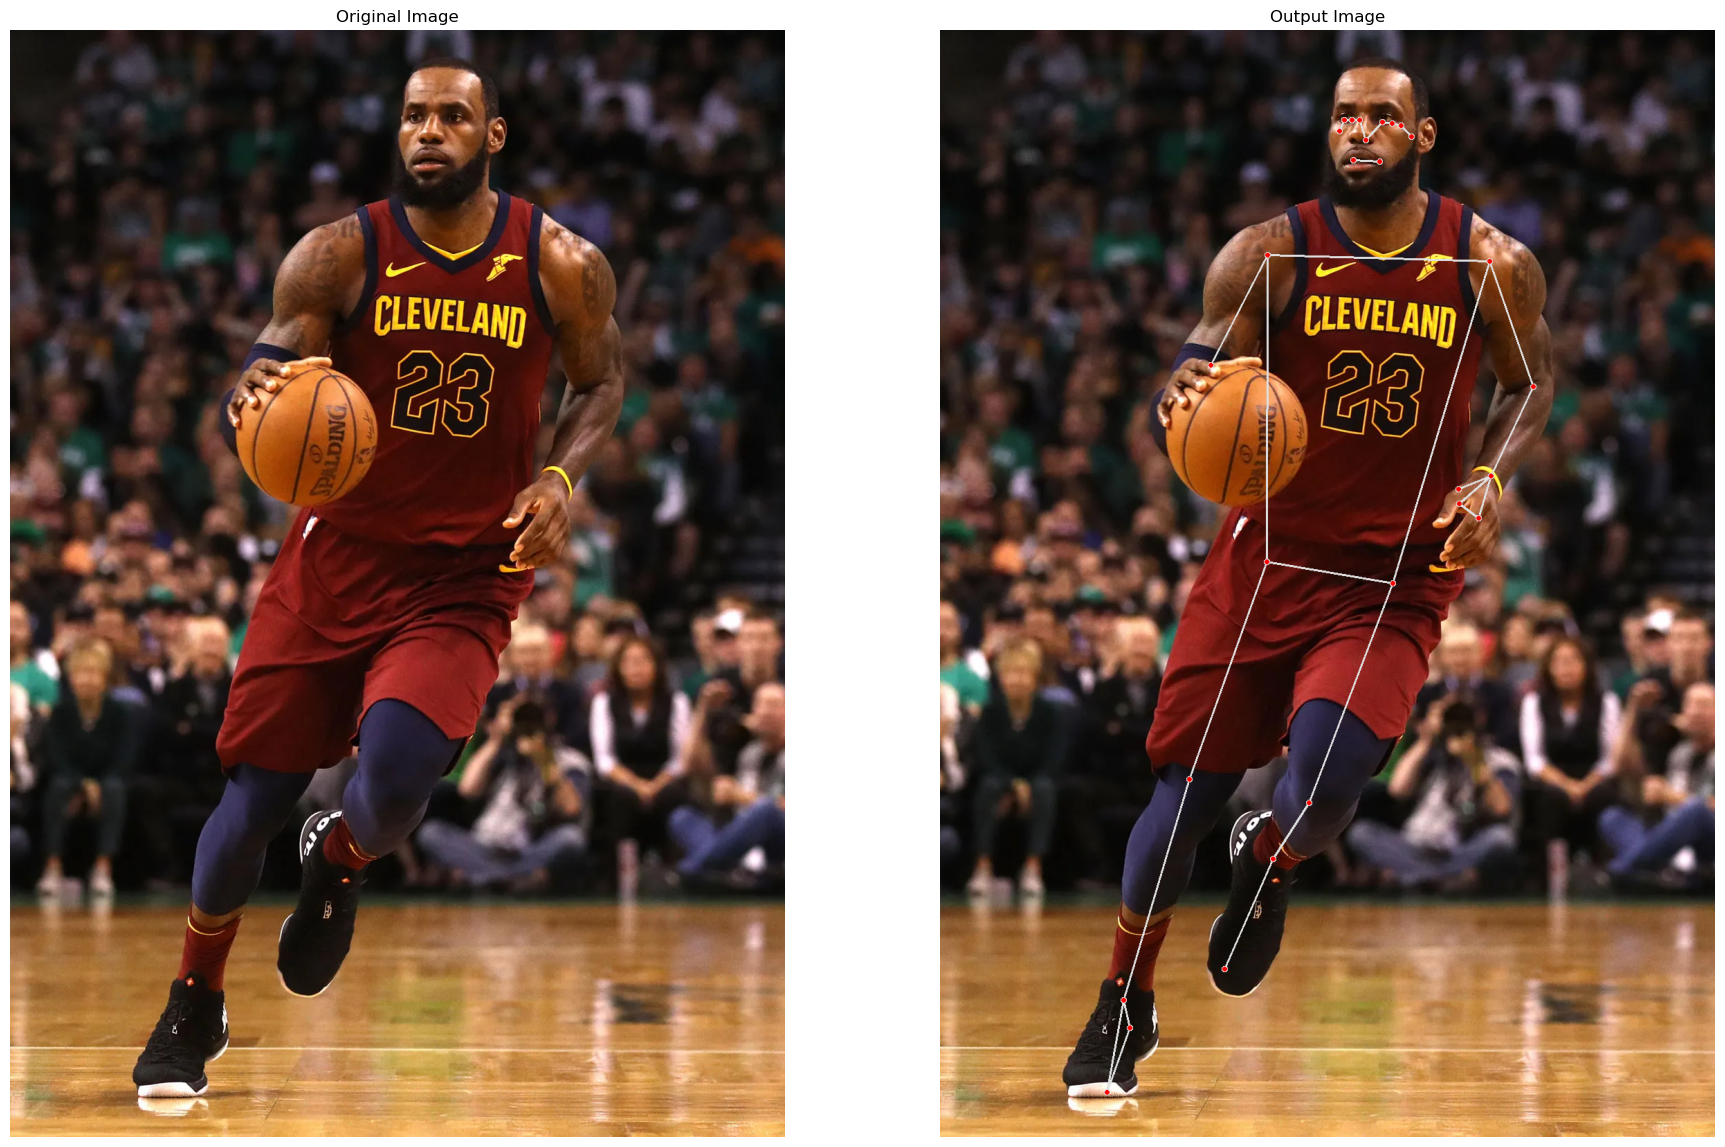

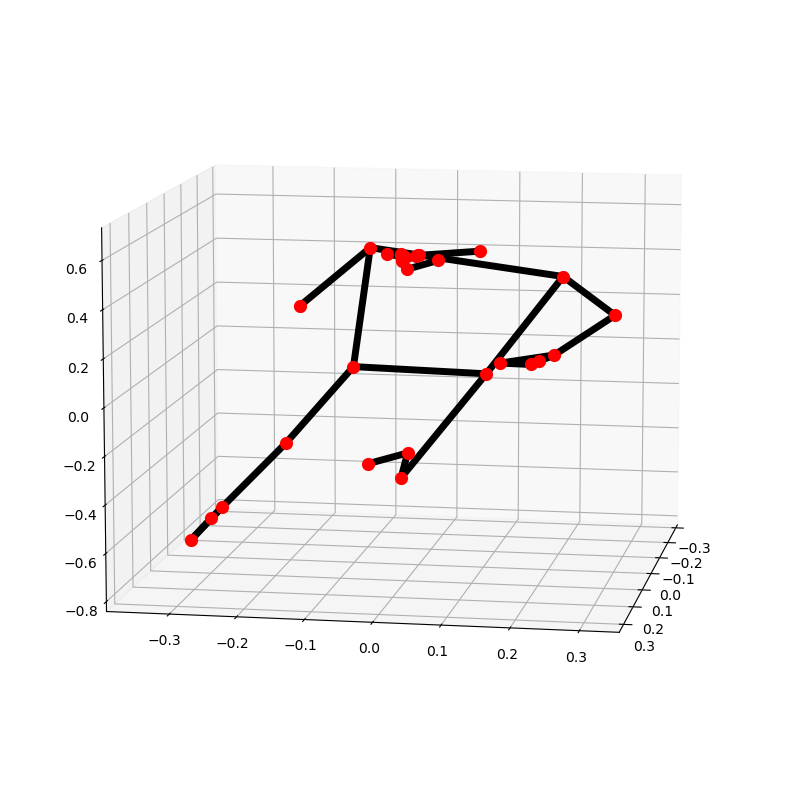

In [4]:
image = cv2.imread('sam.jpg')
detectPose(image, pose, display=True)

In [5]:
def calculateAngle(landmark1, landmark2, landmark3):
    '''
    This function calculates angle between three different landmarks.
    Args:
        landmark1: The first landmark containing the x,y and z coordinates.
        landmark2: The second landmark containing the x,y and z coordinates.
        landmark3: The third landmark containing the x,y and z coordinates.
    Returns:
        angle: The calculated angle between the three landmarks.

    '''

    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    if angle < 0:

        angle += 360
    
    return angle

### **<font style="color:rgb(134,19,348)">Function to Perform Pose Classification</font>**


In [6]:
def classifyPose(landmarks, output_image, display=False):
    
    label = 'Unknown Pose'

    color = (0, 0, 255)
    
    #----------------------------------------------------------------------------------------------------------------
    
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    left_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value])
    
    right_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value])
    
    # Warrier Pose 1
    if left_shoulder_angle > 160 and left_shoulder_angle < 190 or right_shoulder_angle > 160 and right_shoulder_angle < 190 or left_shoulder_angle > 160 and left_shoulder_angle < 190 and right_shoulder_angle > 160 and right_shoulder_angle < 190:

        if left_knee_angle > 160 and left_knee_angle < 195 or right_knee_angle > 160 and right_knee_angle < 195:

            if left_knee_angle > 80 and left_knee_angle < 130 or right_knee_angle > 80 and right_knee_angle < 130:

                label = 'Warrior Pose 1'
   
   # Warrior Pose 2
            
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:

        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:

            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:

                    label = 'Warrior Pose 2' 
                        
    
    # T pose

    if left_knee_angle > 170 and left_knee_angle < 195 and right_knee_angle > 170 and right_knee_angle < 195:

                label = 'T Pose'

    # Tree Pose

    if left_elbow_angle > 165 and left_elbow_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:

            if left_shoulder_angle > 170 and left_shoulder_angle < 200 and right_shoulder_angle > 170 and right_shoulder_angle < 200:

                label = 'Tree Pose'

    # Cobra Pose

    if left_hip_angle > 110 and left_hip_angle < 150 or right_hip_angle > 110 and right_hip_angle < 150:
         
        if left_shoulder_angle > 0 and left_shoulder_angle < 80 or right_shoulder_angle > 0 and right_shoulder_angle < 80 or left_shoulder_angle > 0 and left_shoulder_angle < 80 and right_shoulder_angle > 0 and right_shoulder_angle < 80:
       
            label = 'Cobra Pose' 


    # Lotus Pose

    if left_shoulder_angle > 0 and left_shoulder_angle < 80 and right_shoulder_angle > 0 and right_shoulder_angle < 80:
        
        if left_elbow_angle > 150 and left_elbow_angle < 180 or right_elbow_angle > 150 and right_elbow_angle < 180:

            if left_knee_angle > 10 and left_knee_angle < 50 or right_knee_angle > 10 and right_knee_angle < 50:

                label = 'Lotus Pose'  

    # Downward DOG

    if left_hip_angle > 40 and left_hip_angle < 80 or right_hip_angle > 40 and right_hip_angle < 80:
         label = 'Downward Dog'

    # Bridge Pose

    if left_hip_angle > 160 and left_hip_angle < 190 or right_hip_angle > 160 and right_hip_angle < 190:
        
        if left_shoulder_angle > 270 and left_shoulder_angle < 350 and right_shoulder_angle > 270 and right_shoulder_angle < 350 or left_shoulder_angle > 270 and left_shoulder_angle < 350 or right_shoulder_angle > 270 and right_shoulder_angle < 350:
        
            label = 'Bridge Pose'
    
    # Wheel Pose

    if left_hip_angle > 230 and left_hip_angle < 270 or right_hip_angle > 230 and right_hip_angle < 270:
        
        if left_knee_angle > 100 and left_knee_angle < 140 or right_knee_angle > 100 and right_knee_angle < 140:

            if left_shoulder_angle > 130 and left_shoulder_angle < 180 or right_shoulder_angle > 130 and right_shoulder_angle < 180:

                label = 'Wheel Pose'

    # Goddess Pose

    if left_elbow_angle > 80 and left_elbow_angle < 130 or right_elbow_angle > 80 and right_elbow_angle < 130 :

        if left_knee_angle > 80 and left_knee_angle < 130 or right_knee_angle > 80 and right_knee_angle < 130:

            label = 'goddess Pose'

    # Sitting

    if left_shoulder_angle > 0 and left_shoulder_angle < 80 and right_shoulder_angle > 0 and right_shoulder_angle < 80:
   
        if left_knee_angle > 70 and left_knee_angle < 120 or right_knee_angle > 70 and right_knee_angle < 120:
        
        #if left_hip_angle > 100 and left_hip_angle < 160 or right_hip_angle > 100 and right_hip_angle < 160:

            label = 'Sitting'  
    
    # Standing
    
    if left_hip_angle > 170 and left_hip_angle < 190 or right_hip_angle > 170 and right_hip_angle < 190:
        
        if left_shoulder_angle > 0 and left_shoulder_angle < 50 or right_shoulder_angle > 0 and right_shoulder_angle < 50 or left_shoulder_angle > 0 and left_shoulder_angle < 50 and right_shoulder_angle > 0 and right_shoulder_angle < 50:

            if left_knee_angle > 170 and left_knee_angle < 190 and right_knee_angle > 170 and right_knee_angle < 190 or left_knee_angle > 170 and left_knee_angle < 190 or right_knee_angle > 170 and right_knee_angle < 190:

                label = 'Standing' 
    # Chair pose
    
    if left_knee_angle > 70 and left_knee_angle < 120 or right_knee_angle > 70 and right_knee_angle < 120:
        if left_shoulder_angle > 170 and left_shoulder_angle < 200 and right_shoulder_angle > 170 and right_shoulder_angle < 200:
            if left_elbow_angle > 80 and left_elbow_angle < 200 or right_elbow_angle > 80 and right_elbow_angle < 200 :
              label = 'Chair Pose'
     

    if label != 'Unknown Pose':
        
        color = (0, 255, 0)  
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    if display:
    
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        
        return output_image, label

# Warrior Pose 1




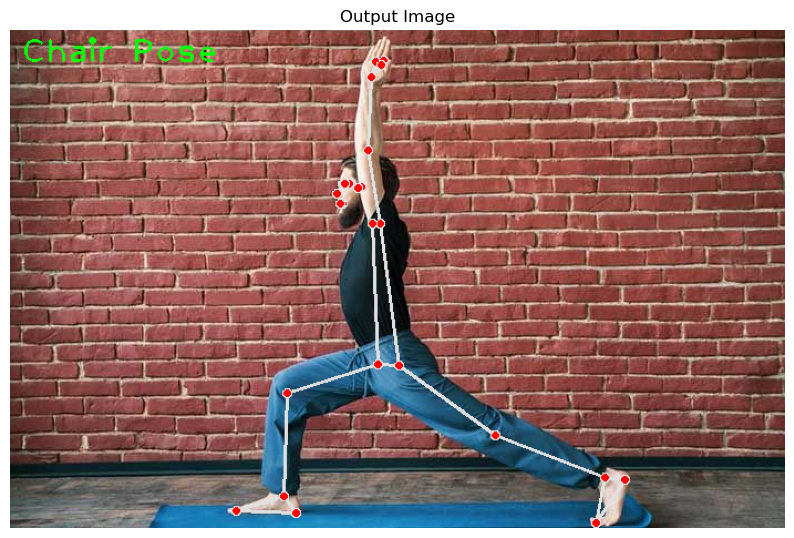

In [7]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('warriorp.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# Warrior Pose 2

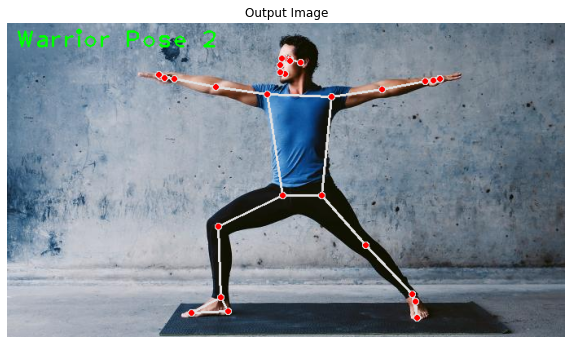

In [11]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('warrior2.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# Tree Pose

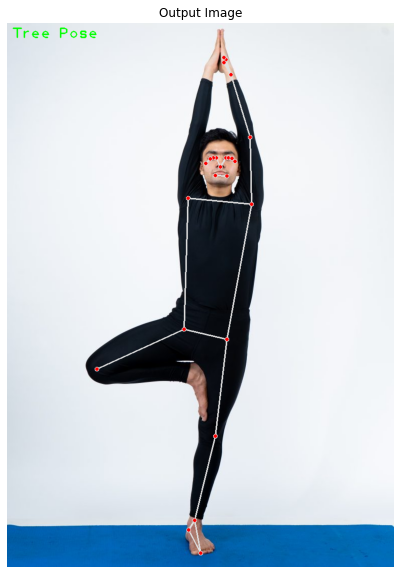

In [12]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('treepose.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# T Pose

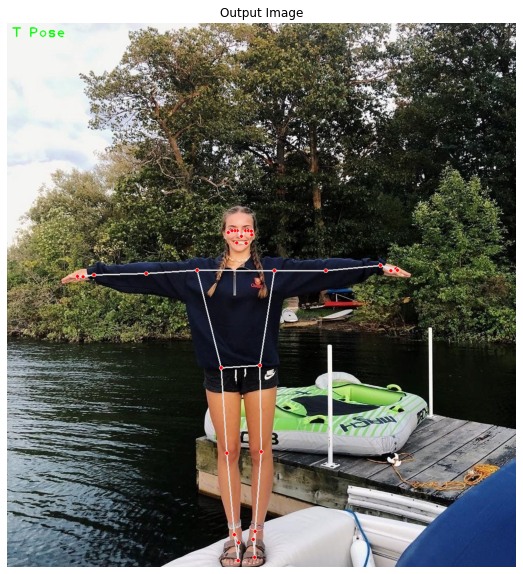

In [13]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('Tpose1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# Cobra Pose

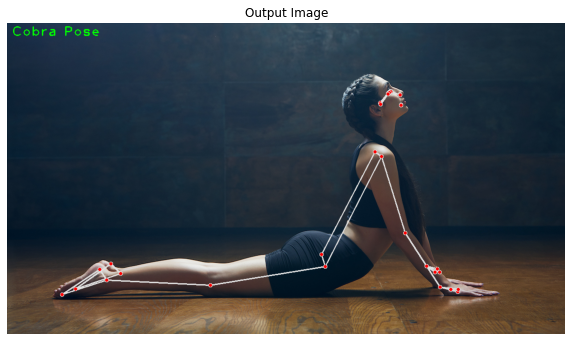

In [14]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('sam12.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# Downward Dog Pose


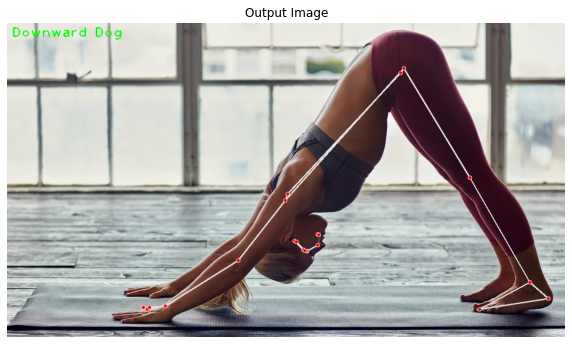

In [15]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('sam16.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# Bridge Pose

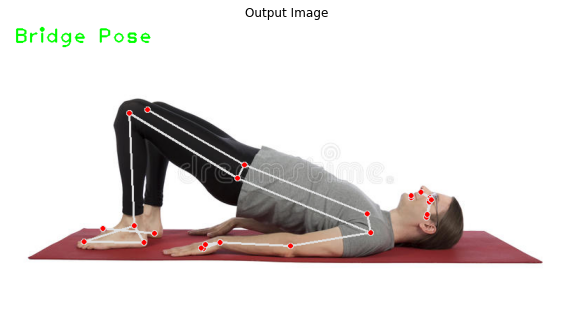

In [16]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('sam22.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# Goddess Pose

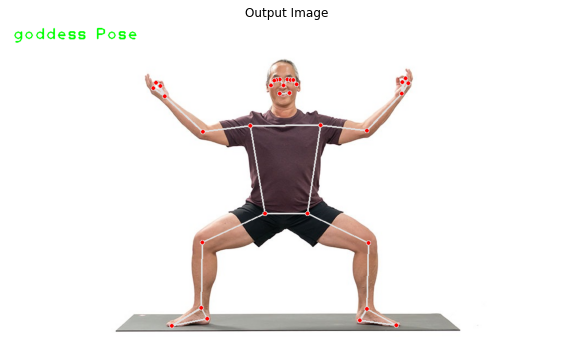

In [17]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('sam28.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# Lotus Pose

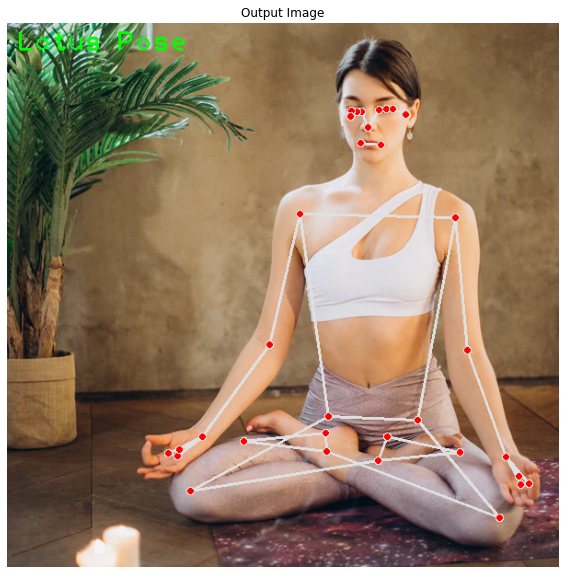

In [18]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('sam11.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# Wheel Pose

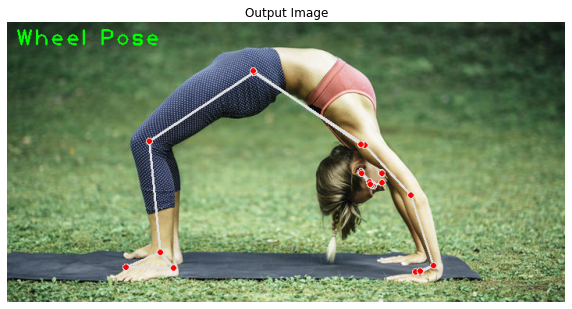

In [19]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('sam26.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# Standing Person

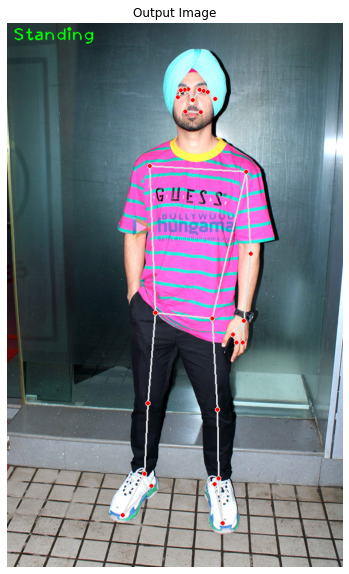

In [20]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('sam1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# Sitting Person

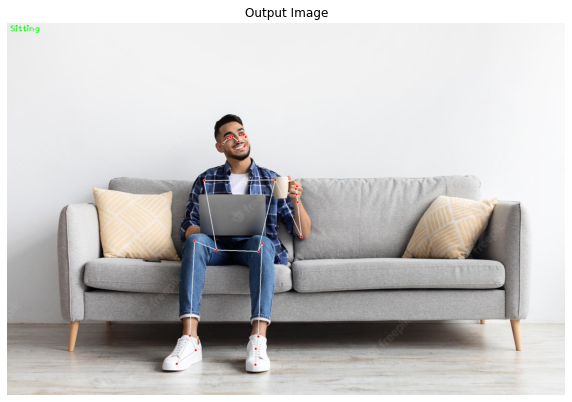

In [21]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('s2.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# Chair pose

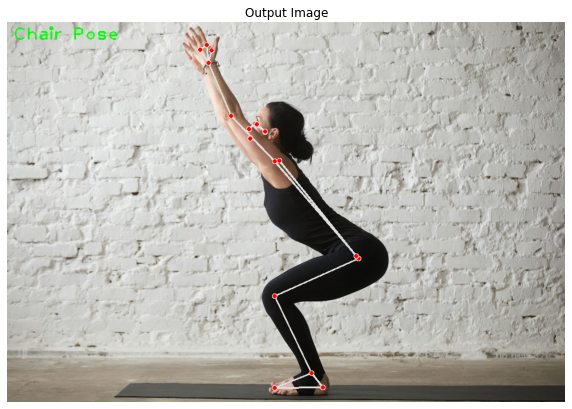

In [28]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('chairp1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# For LIVE Feed

In [9]:

pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)

while camera_video.isOpened():
    
    ok, frame = camera_video.read()
    
    if not ok:
        
        continue
    
    frame = cv2.flip(frame, 1)
    
    frame_height, frame_width, _ =  frame.shape
    
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    frame, landmarks = detectPose(frame, pose_video, display=False)
    
    if landmarks:
        
        frame, _ = classifyPose(landmarks, frame, display=False)
    
    cv2.imshow('Pose Classification', frame)
    
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.

    if(k == 27):
        
        break

camera_video.release()
cv2.destroyAllWindows()